In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/=1-ze7L9QYSfbhZWsIs3Qpeb-FMHqjYYdO' # The shareable link

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1-ze7L9QYSfbhZWsIs3Qpeb-FMHqjYYdO


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
dataset = pd.read_csv('Filename.csv', header=None)
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dataset

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


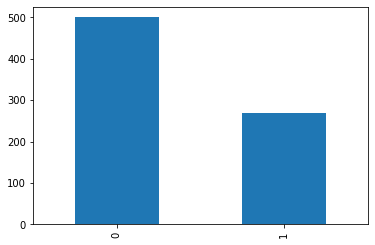

In [ ]:
fig, ax = plt.subplots()
dataset['HasDiabetes'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RFModel = RandomForestClassifier(n_estimators=100, random_state=0)
RFModel.fit(X_train, y_train)
y_pred_rf = RFModel.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBModel = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=5, random_state=0).fit(X_train, y_train)
y_pred_gb = GBModel.predict(X_test)
acc_gb = metrics.accuracy_score(y_test, y_pred_gb)

In [ ]:
from sklearn.neural_network import MLPClassifier

NNModel = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred_nn = NNModel.predict(X_test)
acc_nn = metrics.accuracy_score(y_test, y_pred_nn)

In [ ]:
#print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.7857142857142857
Mean Absolute Error: 0.21428571428571427
Mean Squared Error: 0.21428571428571427
Root Mean Squared Error: 0.4629100498862757


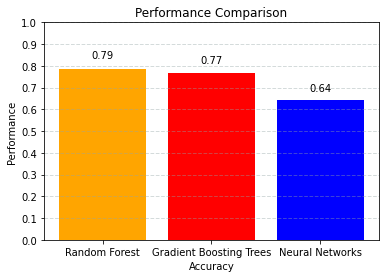

In [ ]:
import matplotlib.pyplot as plt

data = [acc_rf, acc_gb, acc_nn]
label = ['Random Forest','Gradient Boosting Trees','Neural Networks']
rects = plt.bar(label, data, color=['orange', 'red', 'blue'])
plt.title('Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Performance')

for rect in rects:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%.2f' % float(height),
                ha='center', va='bottom')

plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()